## **曽呂利新左衛門問題**

「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。


>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

**【問題1】100日目の米粒の数**  
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

●100日目の米粒の累計

In [1]:
DAYS = 100
#1,2,4,8,16...　その日に貰う米の数 2**0, 2**1, 2**2...
#1,3,7,15,31...　その日までに累計で貰う米の数 2**0, 2**0 + 2**1, 2**0 + 2**1 + 2**2...
#「その日にもらう米の数」と「その日までに累計で貰う米の数」のリストをつくる

rice_quantity_list = [] #「その日にもらう米の数」のリスト
total_rice_quantity_list = [] #「その日までに累計で貰う米の数」のリスト

for i in range(DAYS):
    rice = 2**i
    rice_quantity_list.append(rice)
    total_rice = sum(rice_quantity_list)
    total_rice_quantity_list.append(total_rice)

#print(rice_quantity_list)
#print(len(rice_quantity_list))
#print(total_rice_quantity_list)
#print(len(total_rice_quantity_list))

print("100日目の米粒の累計は、{}粒".format(total_rice_quantity_list[-1]))

100日目の米粒の累計は、1267650600228229401496703205375粒


●「その日にもらう米の数」の推移の折れ線グラフ

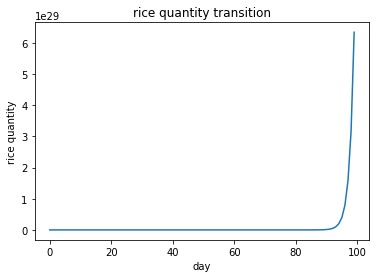

In [2]:
import matplotlib.pyplot as plt

#matplotlib inlineは、matplatlibのインタラクティブサポートを有効化するためのコマンド
%matplotlib inline
plt.title("rice quantity transition")
plt.xlabel("day")
plt.ylabel("rice quantity")
plt.plot(rice_quantity_list) 
plt.show()

●「その日に累計でもらう米の数」の推移の折れ線グラフ

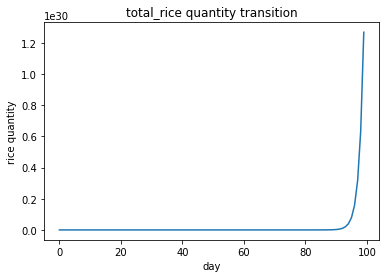

In [3]:
%matplotlib inline
plt.title("total_rice quantity transition")
plt.xlabel("day")
plt.ylabel("rice quantity")
plt.plot(total_rice_quantity_list) 
plt.show()

**【問題2】100日目以外の米粒の数**  
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

●関数の作成

In [4]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。
    日数を与えると、米の増え方の推移を2つのリストとして返す関数。

    Parameter
    --------------
    day: int
        米を貰う日数(default:100)

    Return
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    list_n_grains = []
    list_total_grains = []
    
    for i in range(day):
        rice = 2**i
        list_n_grains.append(rice)
        total_rice = sum(list_n_grains)
        list_total_grains.append(total_rice)
        
    return list_n_grains, list_total_grains

●コースを受講する日数（120日）での累計米粒数

In [5]:
list_n_grains, list_total_grains = compute_sorori_shinzaemon(120)

#print(list_n_grains)
#print(len(list_n_grains))
#print(list_total_grains)
#print(len(list_total_grains))

print("コースを受講する日数（120日）での累計米粒数は{}粒".format(list_total_grains[-1]))

コースを受講する日数（120日）での累計米粒数は1329227995784915872903807060280344575粒


●コースを受講する日数（120日）での累計米粒数の折れ線グラフ

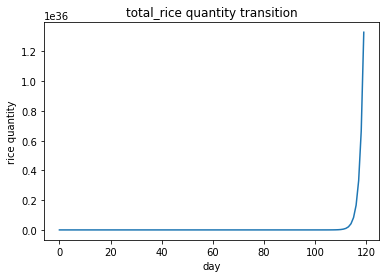

In [6]:
%matplotlib inline
plt.title("total_rice quantity transition")
plt.xlabel("day")
plt.ylabel("rice quantity")
plt.plot(list_total_grains) 
plt.show()

**【問題3】何人が何日生活できる米か**  
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。


ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。



●成人男性が1日に必要な米粒数は最低、3250粒(150g)  
>下記2つのサイトを参考に算出   
https://kuriya.co.jp/blog/health/20180319-479.html
https://www.maff.go.jp/j/heya/sodan/1806/03.html#:~:text=%E5%93%81%E7%A8%AE%E3%82%84%E7%82%8A%E3%81%8D%E6%96%B9%E3%81%AB%E3%82%88%E3%82%8A,%E7%B4%843%EF%BC%8C250%E7%B2%92%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82

●関数の作成

In [7]:
def survival(man, rice):
    """
    人数と米粒数を与えると、生活できる日数を返す関数
    生活できる日数 = 米粒数 / (人数 * 1日の必要米粒数)
    
    Parameter
    ---------------
    man: 人数 int
    rice: 米粒数 int
    
    Return
    --------------
    survival_day: 生活できる日数 int
    """
    NECESSARY_RICE = 3250 #1日の必要米粒数
    survival_day = rice // (man*NECESSARY_RICE) #切り捨て
    
    return survival_day

●コースを受講する期間に貰える米粒で、14人で何日生活できるか

In [8]:
survival_day = survival(man=14, rice=list_total_grains[-1])
print("14人で{}日生活できる".format(survival_day))
print("年換算で、{}年{}日".format(survival_day//365, survival_day % 365))

#survival_day = survival(man=1, rice=3250)
#print(survival_day)

14人で29213802105162986217666089236930日生活できる
年換算で、80037813986747907445660518457年125日
